In [1]:
import ale_py
import pygame
from pygame.locals import QUIT
import matplotlib.pyplot as plt
import numpy as np

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
rom_path = "environments/assault.bin"
env = ale_py.ALEInterface()
env.loadROM(rom_path)

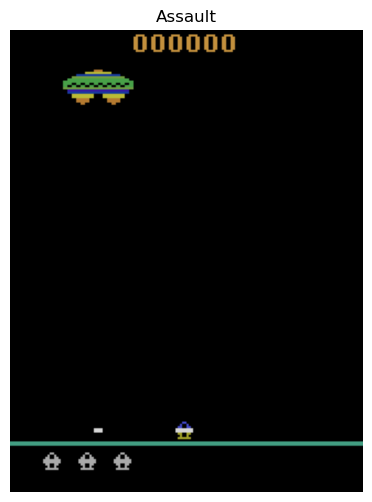

In [3]:
# Reset the environment
env.reset_game()

# Get and display the state space
state = env.getScreenRGB()
plt.figure(figsize=(6, 6))
plt.imshow(state)
plt.title("Assault")
plt.axis('off')
plt.show()


In [4]:
import ale_py

# Define the path to your ROM file
rom_path = r"D:\RL\environments\assault.bin"

# Create an ALEInterface instance
env = ale_py.ALEInterface()

# Load the ROM file
env.loadROM(rom_path)

# Get the minimal action set
actions = env.getMinimalActionSet()
actions1 = env.getLegalActionSet()

print("Number of Legal actions:", len(actions1))
print("Actions:")
for action in actions1:
    print("Action:", action)
    
print("Number of Minimal actions:", len(actions))
print("Actions:")
for action in actions:
    print("Action:", action)

screen_width, screen_height = 160, 210  # Assault game screen size

total_states = screen_width * screen_height * 3  # times 3 because of RGB channels

print("Total states in the environment:", total_states)


Number of Legal actions: 18
Actions:
Action: Action.NOOP
Action: Action.FIRE
Action: Action.UP
Action: Action.RIGHT
Action: Action.LEFT
Action: Action.DOWN
Action: Action.UPRIGHT
Action: Action.UPLEFT
Action: Action.DOWNRIGHT
Action: Action.DOWNLEFT
Action: Action.UPFIRE
Action: Action.RIGHTFIRE
Action: Action.LEFTFIRE
Action: Action.DOWNFIRE
Action: Action.UPRIGHTFIRE
Action: Action.UPLEFTFIRE
Action: Action.DOWNRIGHTFIRE
Action: Action.DOWNLEFTFIRE
Number of Minimal actions: 7
Actions:
Action: Action.NOOP
Action: Action.FIRE
Action: Action.UP
Action: Action.RIGHT
Action: Action.LEFT
Action: Action.RIGHTFIRE
Action: Action.LEFTFIRE
Total states in the environment: 100800


In [7]:
import ale_py
import numpy as np
import pygame
import matplotlib.pyplot as plt

# Initialize Pygame
pygame.init()

# Define the path to your ROM file
rom_path = r"D:\RL\environments\assault.bin"

# Create an ALEInterface instance
env = ale_py.ALEInterface()

# Load the ROM file
env.loadROM(rom_path)

# Get the number of actions
num_actions = env.getLegalActionSet()

# Q-learning parameters
alpha = 0.2  # learning rate
gamma = 0.96  # discount factor
epsilon = 1.0  # exploration rate (starting value)
epsilon_min = 0.1  # minimum exploration rate
epsilon_decay = 0.995  # decay rate for exploration

# Screen dimensions
SCREEN_WIDTH, SCREEN_HEIGHT = 160, 210  # Assault game screen size

# Set up the display
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Assault Game")

# Number of epochs
epochs = 50

# Initialize Q-table
q_table = np.zeros((len(num_actions),))

# List to store Q-values for plotting
q_values = []

# Action names
action_names = [f"Action {i}" for i in range(len(num_actions))]

# # Set up the clock for controlling FPS
# clock = pygame.time.Clock()
# FPS = 120

# Main loop
for epoch in range(epochs):
    state = env.reset_game()
    total_reward = 0

    while not env.game_over():
        # Set FPS
        # clock.tick(FPS)

        # Get current state
        state = env.getScreenRGB()

        # Scale the state image to fit the Pygame window
        scaled_surface = pygame.transform.scale(pygame.surfarray.make_surface(state.swapaxes(0, 1)),
                                                (SCREEN_WIDTH, SCREEN_HEIGHT))

        # Display the state
        screen.blit(scaled_surface, (0, 0))

        # Update the display
        pygame.display.flip()

        # Epsilon-greedy policy for action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(q_table)

        # Take action and observe reward and next state
        reward = env.act(action)
        total_reward += reward

        # Collect Q-values for plotting
        q_values.append(q_table.copy())

        next_state = env.getScreenRGB()

        # Update Q-value
        next_state_max_q_value = np.max(q_table)
        q_table[action] += alpha * (reward + gamma * next_state_max_q_value - q_table[action])

        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    print("Epoch:", epoch + 1, "Total Reward:", total_reward)

pygame.quit()

# Save Q-table
np.save('q_table.npy', q_table)




Epoch: 1 Total Reward: 399
Epoch: 2 Total Reward: 399
Epoch: 3 Total Reward: 399
Epoch: 4 Total Reward: 336
Epoch: 5 Total Reward: 420
Epoch: 6 Total Reward: 231
Epoch: 7 Total Reward: 315
Epoch: 8 Total Reward: 420
Epoch: 9 Total Reward: 483
Epoch: 10 Total Reward: 336
Epoch: 11 Total Reward: 189
Epoch: 12 Total Reward: 252
Epoch: 13 Total Reward: 420
Epoch: 14 Total Reward: 168
Epoch: 15 Total Reward: 231
Epoch: 16 Total Reward: 399
Epoch: 17 Total Reward: 273
Epoch: 18 Total Reward: 315
Epoch: 19 Total Reward: 252
Epoch: 20 Total Reward: 273
Epoch: 21 Total Reward: 168
Epoch: 22 Total Reward: 420
Epoch: 23 Total Reward: 399
Epoch: 24 Total Reward: 399
Epoch: 25 Total Reward: 399
Epoch: 26 Total Reward: 399
Epoch: 27 Total Reward: 273
Epoch: 28 Total Reward: 189
Epoch: 29 Total Reward: 252
Epoch: 30 Total Reward: 210
Epoch: 31 Total Reward: 399
Epoch: 32 Total Reward: 378
Epoch: 33 Total Reward: 189
Epoch: 34 Total Reward: 210
Epoch: 35 Total Reward: 294
Epoch: 36 Total Reward: 462
E

In [3]:
pygame.quit()

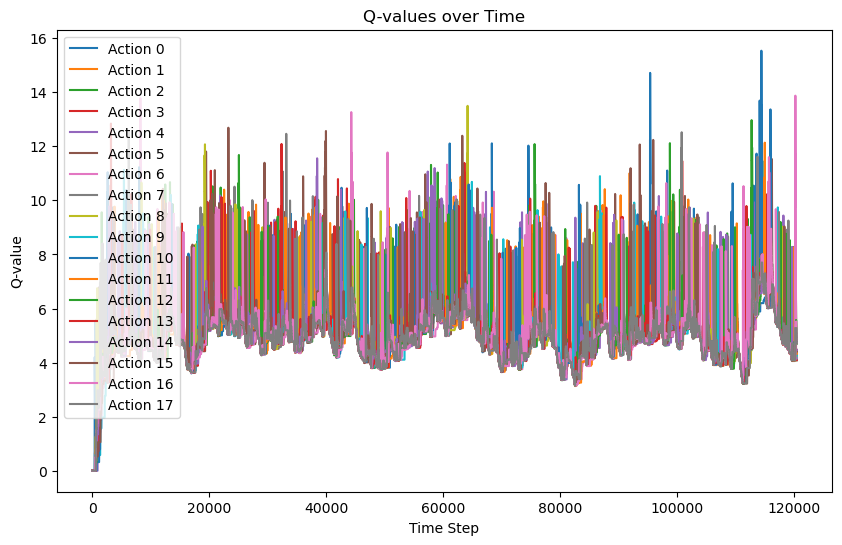

In [8]:
# Plot Q-values
plt.figure(figsize=(10, 6))
for i in range(len(num_actions)):
    plt.plot(np.arange(len(q_values)), [q[i] for q in q_values], label=f"Action {i}")
plt.xlabel('Time Step')
plt.ylabel('Q-value')
plt.title('Q-values over Time')
plt.legend()
plt.show()

# Testing Code

Episode: 1 Total Reward: 273
Episode: 2 Total Reward: 252
Episode: 3 Total Reward: 378
Episode: 4 Total Reward: 462
Episode: 5 Total Reward: 357
Episode: 6 Total Reward: 231
Episode: 7 Total Reward: 294
Episode: 8 Total Reward: 294
Episode: 9 Total Reward: 294
Episode: 10 Total Reward: 357


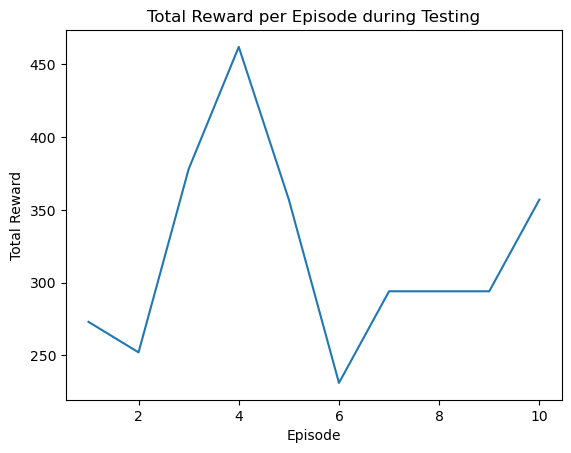

In [10]:
import ale_py
import numpy as np
import pygame
import matplotlib.pyplot as plt

# Initialize Pygame
pygame.init()

# Define the path to your ROM file
rom_path = r"D:\RL\environments\assault.bin"

# Create an ALEInterface instance
env = ale_py.ALEInterface()

# Load the ROM file
env.loadROM(rom_path)

# Get the number of actions
num_actions = env.getLegalActionSet()

# Load the trained Q-table
q_table = np.load('q_table.npy')

# Screen dimensions
SCREEN_WIDTH, SCREEN_HEIGHT = 160, 210  # Assault game screen size

# Set up the display
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Assault Game")

# Number of test episodes
test_episodes = 10

# Font for displaying text
font = pygame.font.Font(None, 24)

# Lists to store rewards for plotting
test_rewards = []

# Testing loop
for episode in range(test_episodes):
    # Reset environment for new episode
    env.reset_game()
    total_reward = 0
    
    # Main game loop
    while not env.game_over():
        # Get current state
        state = env.getScreenRGB()
        
        # Scale the state image to fit the Pygame window
        scaled_surface = pygame.transform.scale(pygame.surfarray.make_surface(state.swapaxes(0, 1)), (SCREEN_WIDTH, SCREEN_HEIGHT))
        
        # Display the state
        screen.blit(scaled_surface, (0, 0))
        
        # Display episode and total reward
        text = font.render(f"Episode {episode+1} - Total Reward: {total_reward}", True, (255, 255, 255))
        screen.blit(text, (10, 10))
        
        # Update the display
        pygame.display.flip()
        
        # Epsilon-greedy policy for action selection during testing
        if np.random.rand() < 0.05:  # exploitation
            action = np.argmax(q_table)
        else:
            action = np.random.choice(num_actions)  # exploration
        
        # Take action and observe reward
        reward = env.act(action)
        total_reward += reward
        
        
    
    # Store total reward for the episode
    test_rewards.append(total_reward)
    print("Episode:", episode+1, "Total Reward:", total_reward)

# Close Pygame
pygame.quit()

# Plotting rewards graph
plt.plot(range(1, test_episodes+1), test_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode during Testing')
plt.show()
